# Aprendizaje No Supervisado - Diplodatos 2021

### Integrantes:
<li> Pablo Carrazana
<li> Luis Juncos
<li> Bruno Garcia
<li> Martin Peñas

# Práctico Entregable


Utilizar la base de jugadores “players_21.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv. Considerar que la base 2021 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019_Colab, ntb_clustering_2_fifa2019_Colab y ntb4_embeddings_fifa2019_Colab). Realicen comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio (sintético, no muy extenso) .

2- Evaluación visual e intuitiva de a dos variables por vez.

3- Uso de técnicas de clustering: k-Medias, Mean Shift y Alguna jerárquica (sugerencia: usar 'cityblock' como distancia en el jerárquico).

4- Análisis de los clusters encontrados.

5- Embeddings y técnicas de clustering.

6- Evaluación.

7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?




## Inicialización del Entorno
Importamos las librerias que utilizaremos y cargamos los datos

In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [26]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import missingno as msno

## Exploramos la base de datos
Cargamos los datos de la database de la consigna. Link Kaggle https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv.

In [5]:
df = pd.read_csv("players_21.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,...,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,...,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,...,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"

In [6]:
df.tail(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,35000,1000,CB,Right,1,2,2,Low/Medium,Normal,No,57000.0,NaN,RES,2.0,NaN,2019-02-01,2022.0,NaN,NaN,51.0,25.0,29.0,36.0,45.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,20,46,40,...,54,49,40,45,57,35,69,58,55,22,46,45,25,25,35,40,NaN,55,45,12,9,14,15,13,34+2,34+2,34+2,33+0,33+0,33+0,33+0,33+0,33+2,33+2,33+2,35+2,35+2,35+2,35+2,35+2,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,65000.0,NaN,RDM,4.0,NaN,2020-08-01,2023.0,NaN,NaN,61.0,35.0,48.0,48.0,44.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,32,45,56,...,62,60,59,51,53,45,56,48,63,33,56,40,31,45,42,43,NaN,49,45,15,7,7,5,13,44+2,44+2,44+2,46+0,45+0,45+0,45+0,46+0,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18943,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,Yue Song,28,1991-11-20,185,79,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,47,30000,2000,CM,Right,1,2,2,Low/Low,Lean,No,47000.0,NaN,RES,33.0,NaN,2020-08-01,2022.0,NaN,NaN,65.0,37.0,49.0,46.0,40.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,32,44,56,...,67,64,56,44,55,49,59,54,62,34,57,35,48,44,36,35,NaN,43,45,8,5,11,5,7,46+1,46+1,46+1,47+0,46+0,46+0,46+0,47+0,47+0,47+0,47+0,49+,47+0,47+0,47+0,49+,47+0,47+0,47+0,47+0,47+0,47+0,46+1,46+1,46+1,47+0


In [21]:
columns = pd.DataFrame()
columns = df.columns.to_frame()
print(len(df.columns))

106


In [22]:
columns

,0
sofifa_id,sofifa_id
player_url,player_url
short_name,short_name
long_name,long_name
age,age
dob,dob
height_cm,height_cm
weight_kg,weight_kg
nationality,nationality
club_name,club_name


In [24]:
missing_values_count = df.isnull().sum()
missing_values_count

<AxesSubplot:>

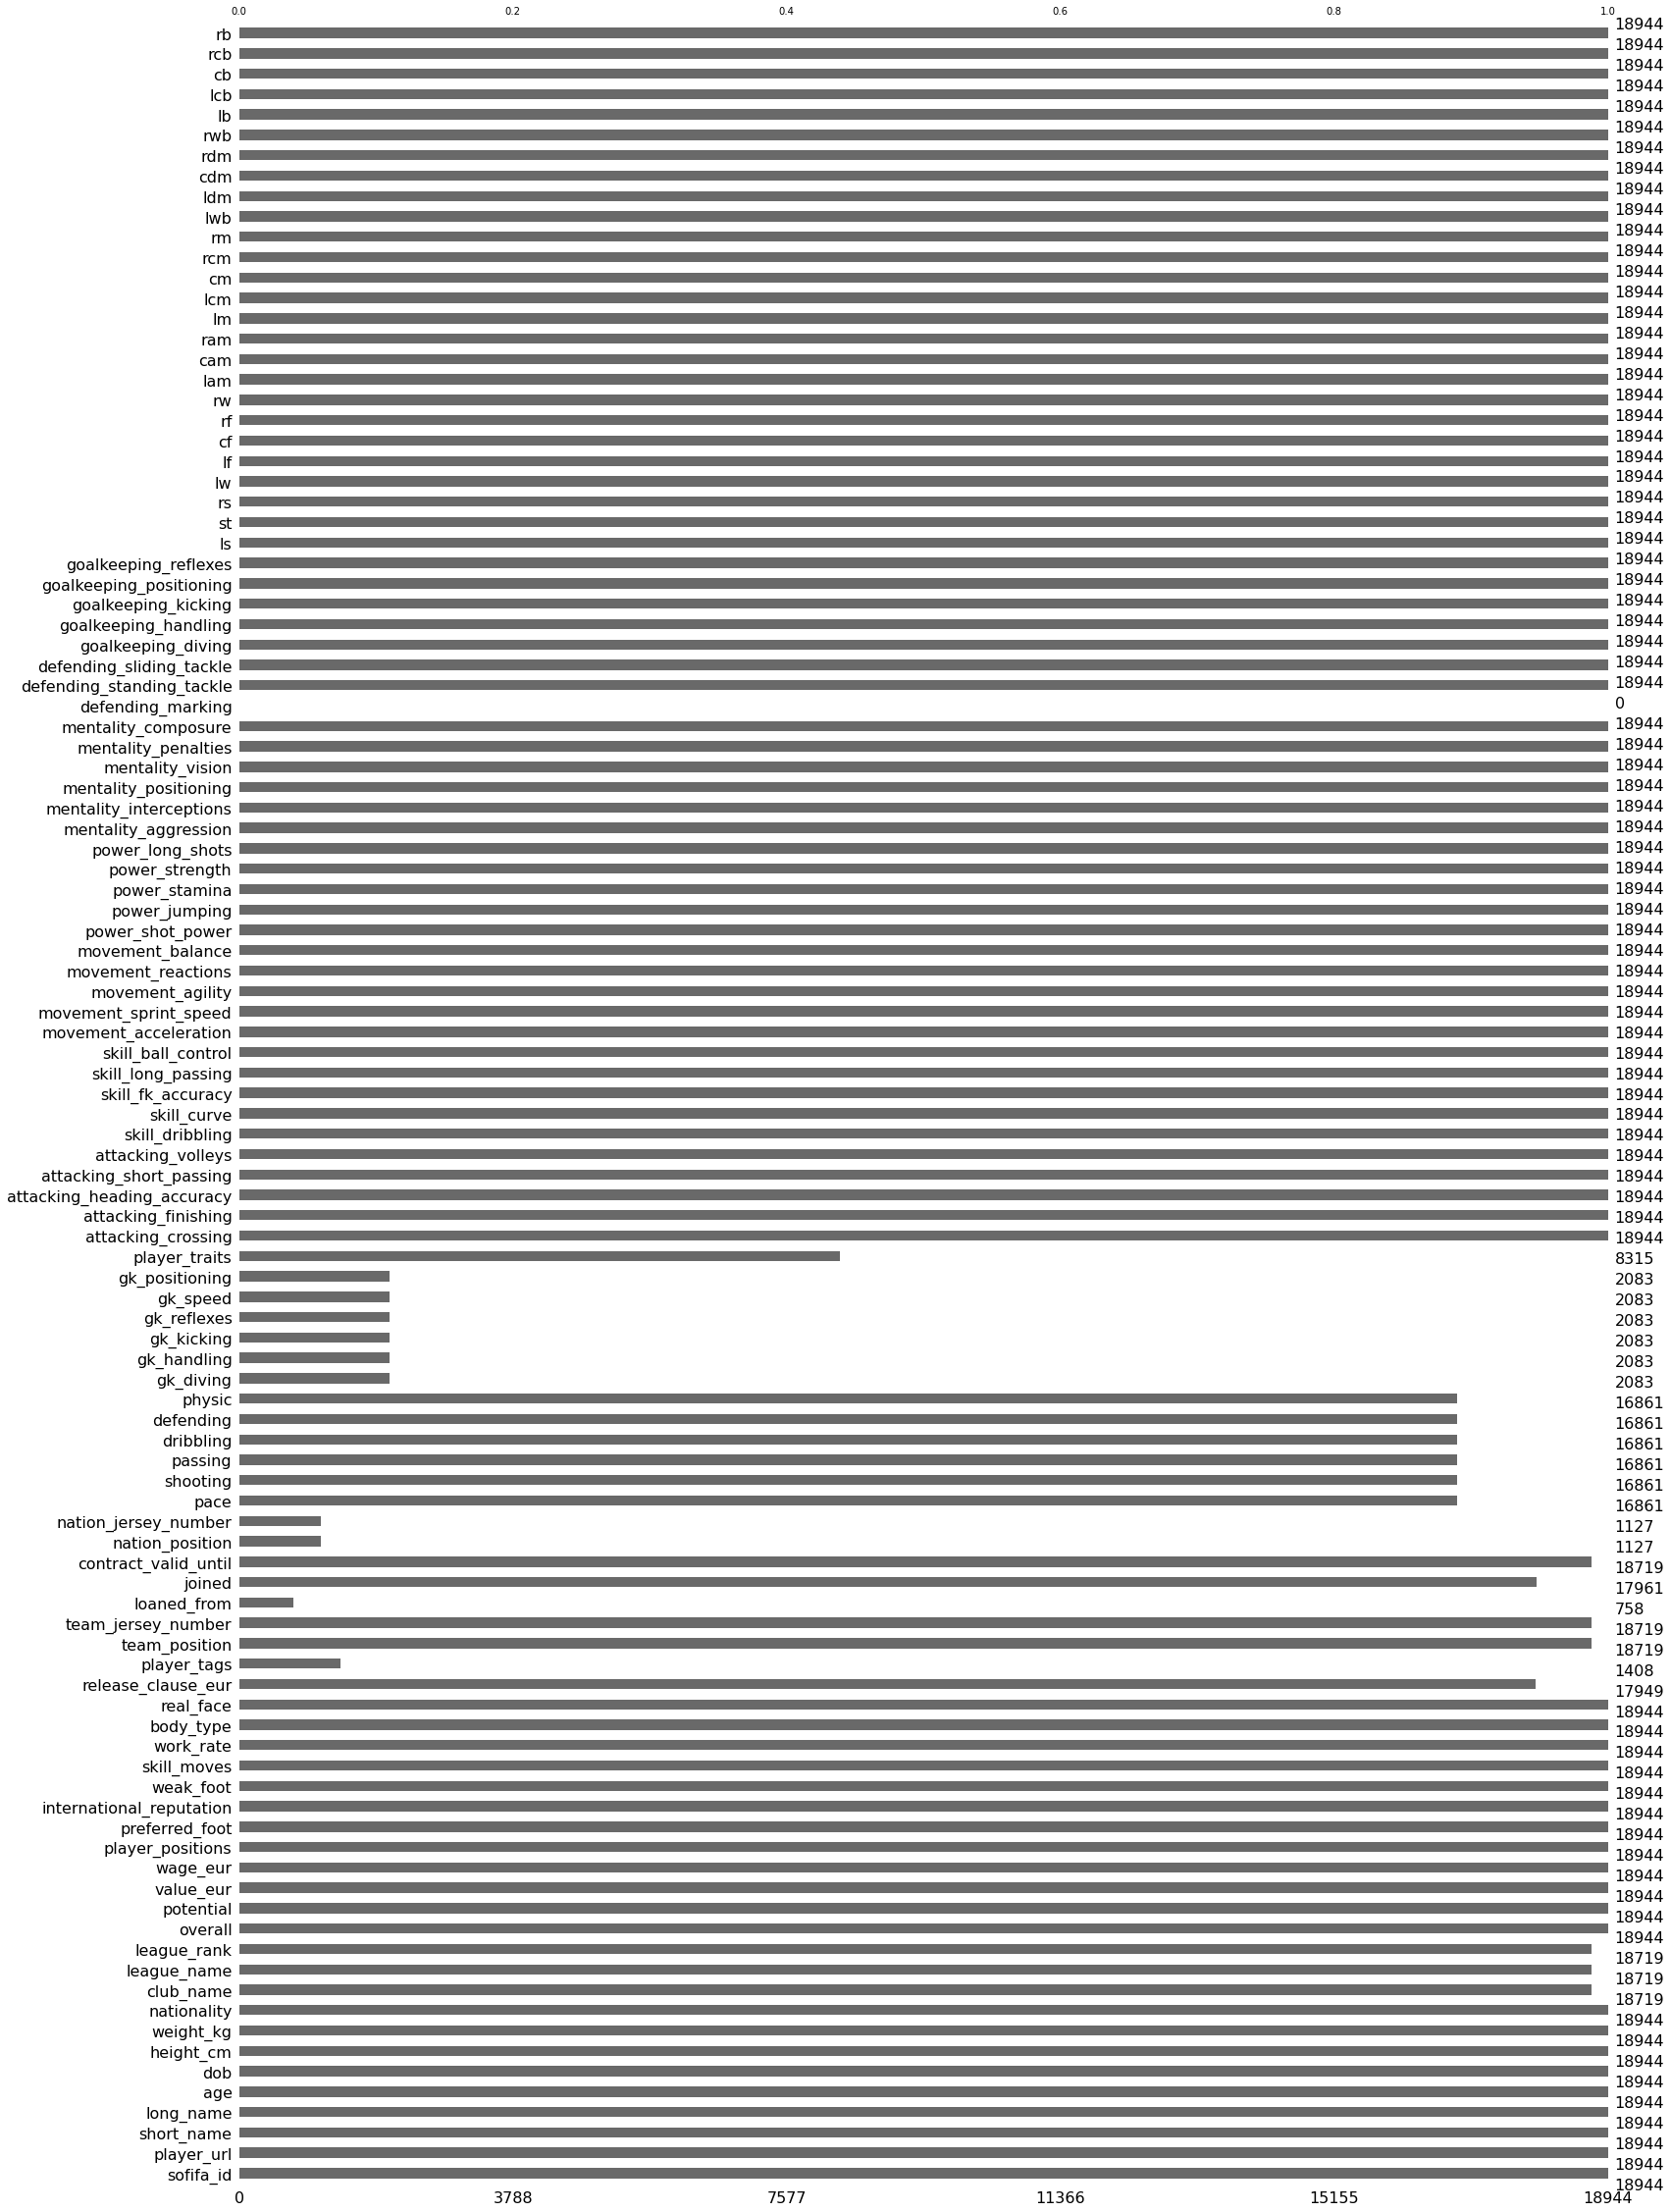

In [29]:
msno.bar(df)

In [ ]:
quitar defending_marking 

<AxesSubplot:>

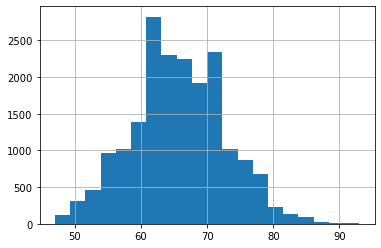

In [42]:
df["overall"].hist(bins=20)

In [40]:
best_players_per_position=df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Position','Name','Overall']]
best_players_per_position

KeyError: 'Position'

In [322]:
maxValueIndex = df.idxmax(axis=0) 

TypeError: reduction operation 'argmax' not allowed for this dtype

In [230]:
df.idxmax["ls","st","rs","lw","lf","cf","rf","rw", "lam","cam", "ram","lm", "lcm","cm", "rcm", "rm", "lwb", "ldm", "cdm","rdm", "rwb", "lb", "lcb", "cb", "rcb","rb"](axis="columns")

TypeError: 'method' object is not subscriptable

In [296]:
positions = ["sofifa_id",'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 
             'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [297]:
a = df[positions]

In [298]:
columns = 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 
'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'

('cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb')

In [314]:
def cleanPos(x):
    return x.str[:-2]

In [317]:
b = a.apply(cleanPos, axis=1)

In [318]:
b

,sofifa_id,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,NaN,,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,65,65,65,66,62,52,52,52,62
1,NaN,,91,91,89,91,91,91,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,54,54,54,61
2,NaN,,33,33,32,35,35,35,32,38,38,38,35,38,38,38,35,32,36,36,36,32,32,33,33,33,32
3,NaN,,89,89,85,87,87,87,85,85,85,85,83,79,79,79,83,64,65,65,65,64,61,60,60,60,61
4,NaN,,84,84,90,89,89,89,90,90,90,90,90,83,83,83,90,67,62,62,62,67,62,49,49,49,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,NaN,,44,44,47,45,45,45,47,47,47,47,48,47,47,47,48,47,47,47,47,47,47,46,46,46,47
18940,NaN,,32,32,30,30,30,30,30,29,29,29,31,32,32,32,31,42,41,41,41,42,45,47,47,47,45
18941,NaN,,34,34,33,33,33,33,33,33,33,33,35,35,35,35,35,42,42,42,42,42,44,47,47,47,44
18942,NaN,,44,44,46,45,45,45,46,47,47,47,47,47,47,47,47,47,49,49,49,47,47,49,49,49,47


In [328]:
b.idxmax["ls","st","rs","lw","lf","cf","rf","rw", "lam","cam", "ram","lm", "lcm","cm", "rcm", "rm", "lwb", "ldm", "cdm","rdm", "rwb", "lb", "lcb", "cb", "rcb","rb"](axis="columns")

TypeError: 'method' object is not subscriptable

Buscar método para conocer cuál es el valor más alto de las posiciones de los jugadores, para poder asignarsela.

In [323]:
maxValueIndex = b.idxmax(axis=0) 

TypeError: reduction operation 'argmax' not allowed for this dtype

In [324]:
b = b.to_numeric()

AttributeError: 'DataFrame' object has no attribute 'to_numeric'

In [327]:
b["ls"] = pd.to_numeric(b["ls"])

In [346]:
b["max"] = b[b.columns.difference(["sofifa_id"])].idxmax(axis=1)

In [341]:
b = b.apply(pd.to_numeric)

In [348]:
b["max"]

0        cam
1         cf
2        cam
3         rs
4        cam
        ... 
18939     lm
18940     cb
18941     cb
18942     cb
18943    cam
Name: max, Length: 18944, dtype: object